In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.font_manager as fm

from sklearn.preprocessing import LabelEncoder
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from statsmodels.stats.outliers_influence import variance_inflation_factor

from sklearn.model_selection import train_test_split, cross_val_score, KFold, cross_val_predict, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from catboost import CatBoostClassifier
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score,
                           roc_curve, auc, precision_recall_curve, confusion_matrix,
                           classification_report, average_precision_score)
from sklearn.calibration import calibration_curve 
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.ensemble import VotingClassifier

In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd 
import matplotlib.font_manager as fm
from sklearn.preprocessing import LabelEncoder
# 1. 설치된 한글 폰트 확인
fonts = [f.name for f in fm.fontManager.ttflist]
print('설치된 폰트 목록:', fonts)

# 2. 한글 폰트 설정 (아래 폰트 중 하나 선택)
plt.rc('font', family='Malgun Gothic')  # 맑은 고딕
# plt.rc('font', family='NanumGothic')  # 나눔고딕
# plt.rc('font', family='NanumBarunGothic')  # 나눔바른고딕

# 3. 마이너스 기호 깨짐 방지
plt.rc('axes', unicode_minus=False)

설치된 폰트 목록: ['STIXSizeOneSym', 'DejaVu Sans Mono', 'STIXNonUnicode', 'DejaVu Sans', 'DejaVu Sans', 'DejaVu Sans', 'cmr10', 'DejaVu Serif', 'DejaVu Serif', 'DejaVu Sans Mono', 'STIXSizeThreeSym', 'STIXSizeThreeSym', 'STIXSizeOneSym', 'STIXSizeFourSym', 'DejaVu Sans Mono', 'STIXSizeFourSym', 'STIXSizeTwoSym', 'STIXGeneral', 'cmmi10', 'DejaVu Serif', 'cmss10', 'cmtt10', 'cmb10', 'STIXGeneral', 'DejaVu Sans Display', 'DejaVu Sans Mono', 'STIXGeneral', 'STIXGeneral', 'DejaVu Serif', 'DejaVu Sans', 'cmex10', 'cmsy10', 'STIXNonUnicode', 'STIXNonUnicode', 'STIXSizeTwoSym', 'STIXSizeFiveSym', 'STIXNonUnicode', 'DejaVu Serif Display', 'Franklin Gothic Heavy', 'Magic R', 'HYMyeongJo-Extra', 'French Script MT', 'Tw Cen MT Condensed', 'Javanese Text', 'Bodoni MT', 'Arial', 'Segoe UI', 'Segoe UI', 'Bodoni MT', 'HYSinMyeongJo-Medium', 'Comic Sans MS', 'Book Antiqua', 'Segoe MDL2 Assets', 'Leelawadee', 'Webdings', 'Wingdings', 'Poor Richard', 'Bodoni MT', 'Franklin Gothic Book', 'Eras Demi ITC', 'Leela

In [ ]:
cd ../

c:\Users\okpl8\Documents\project_LG\src


In [ ]:
cd ../

c:\Users\okpl8\Documents\project_LG


In [ ]:
train = pd.read_csv('./data/train.csv')
test = pd.read_csv('./data/test.csv')
train.head()

,ID,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRAIN_000000,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRAIN_000001,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRAIN_000002,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRAIN_000003,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRAIN_000004,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 256351 entries, 0 to 256350
Data columns (total 69 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   ID                     256351 non-null  object 
 1   시술 시기 코드               256351 non-null  object 
 2   시술 당시 나이               256351 non-null  object 
 3   임신 시도 또는 마지막 임신 경과 연수  9370 non-null    float64
 4   시술 유형                  256351 non-null  object 
 5   특정 시술 유형               256349 non-null  object 
 6   배란 자극 여부               256351 non-null  int64  
 7   배란 유도 유형               256351 non-null  object 
 8   단일 배아 이식 여부            250060 non-null  float64
 9   착상 전 유전 검사 사용 여부       2718 non-null    float64
 10  착상 전 유전 진단 사용 여부       250060 non-null  float64
 11  남성 주 불임 원인             256351 non-null  int64  
 12  남성 부 불임 원인             256351 non-null  int64  
 13  여성 주 불임 원인             256351 non-null  int64  
 14  여성 부 불임 원인             256351 non-nu

In [ ]:
train.describe()


,임신 시도 또는 마지막 임신 경과 연수,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,여성 부 불임 원인,부부 주 불임 원인,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
count,9370.000000,256351.000000,250060.000000,2718.0,250060.000000,256351.000000,256351.000000,256351.000000,256351.000000,256351.000000,...,250060.000000,250060.000000,2179.0,1929.0,198863.0,1436.000000,202616.000000,212785.000000,40369.000000,256351.000000
mean,9.270651,0.771286,0.233476,1.0,0.012781,0.028516,0.013115,0.030724,0.012432,0.033068,...,0.009830,0.004195,1.0,1.0,0.0,0.001393,0.005385,3.254741,0.045629,0.258349
std,3.550313,0.420005,0.423043,0.0,0.112328,0.166441,0.113767,0.172568,0.110805,0.178814,...,0.098656,0.064633,0.0,0.0,0.0,0.037307,0.111504,1.715697,0.418672,0.437728
min,0.000000,0.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000
25%,7.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,2.000000,0.000000,0.000000
50%,9.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,3.000000,0.000000,0.000000
75%,11.000000,1.000000,0.000000,1.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.0,1.0,0.0,0.000000,0.000000,5.000000,0.000000,1.000000
max,20.000000,1.000000,1.000000,1.0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.0,1.0,0.0,1.000000,7.000000,7.000000,7.000000,1.000000


In [ ]:
train = train.drop(['ID'], axis=1)
test = test.drop(['ID'], axis=1)
train.head()

,시술 시기 코드,시술 당시 나이,임신 시도 또는 마지막 임신 경과 연수,시술 유형,특정 시술 유형,배란 자극 여부,배란 유도 유형,단일 배아 이식 여부,착상 전 유전 검사 사용 여부,착상 전 유전 진단 사용 여부,...,기증 배아 사용 여부,대리모 여부,PGD 시술 여부,PGS 시술 여부,난자 채취 경과일,난자 해동 경과일,난자 혼합 경과일,배아 이식 경과일,배아 해동 경과일,임신 성공 여부
0,TRZKPL,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0
1,TRYBLT,만45-50세,NaN,IVF,ICSI,0,알 수 없음,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
2,TRVNRY,만18-34세,NaN,IVF,IVF,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,2.0,NaN,0
3,TRJXFG,만35-37세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,NaN,NaN,0
4,TRVNRY,만18-34세,NaN,IVF,ICSI,1,기록되지 않은 시행,0.0,NaN,0.0,...,0.0,0.0,NaN,NaN,0.0,NaN,0.0,3.0,NaN,0


In [ ]:
# obj중 알수없음이 많은것은 없앰, 결측치 비율이 많은것도 제외외
train = train.drop(['배란 유도 유형', '난자 기증자 나이', '정자 기증자 나이', '임신 시도 또는 마지막 임신 경과 연수', '착상 전 유전 검사 사용 여부', 'PGD 시술 여부', 'PGS 시술 여부','난자 해동 경과일','배아 해동 경과일' ], axis=1)
train.head()
test = test.drop(['배란 유도 유형', '난자 기증자 나이', '정자 기증자 나이', '임신 시도 또는 마지막 임신 경과 연수', '착상 전 유전 검사 사용 여부', 'PGD 시술 여부', 'PGS 시술 여부','난자 해동 경과일','배아 해동 경과일' ], axis=1)
test.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,기증자 정자와 혼합된 난자 수,난자 출처,정자 출처,동결 배아 사용 여부,신선 배아 사용 여부,기증 배아 사용 여부,대리모 여부,난자 채취 경과일,난자 혼합 경과일,배아 이식 경과일
0,TRYBLT,만35-37세,IVF,IVF,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,NaN
1,TRDQAZ,만18-34세,IVF,IVF,1,0.0,0.0,0,0,0,...,1.0,본인 제공,기증 제공,0.0,1.0,0.0,0.0,0.0,0.0,NaN
2,TRCMWS,만40-42세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,3.0
3,TRJXFG,만40-42세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,2.0
4,TRJXFG,만35-37세,IVF,ICSI,1,0.0,0.0,0,0,0,...,0.0,본인 제공,배우자 제공,0.0,1.0,0.0,0.0,0.0,0.0,5.0


In [ ]:
#인코딩
label_cols = ['총 시술 횟수', '클리닉 내 총 시술 횟수', 'IVF 시술 횟수','DI 시술 횟수', '총 임신 횟수',
              'IVF 임신 횟수','시술 시기 코드','시술 당시 나이', "시술 유형", "난자 출처", "정자 출처",
              'DI 임신 횟수','총 출산 횟수','IVF 출산 횟수','DI 출산 횟수']
le = LabelEncoder()
for col in label_cols:
    train[col] = le.fit_transform(train[col])  # train에 fit
    test[col] = le.transform(test[col])  # test에는 transform만 적용


In [ ]:
# 배아 생성 주요 이유 그룹화 함수
def categorize_embryo_reason(x):
    if "현재 시술용" in x:
        return "Current"
    elif "배아 저장용" in x:
        return "Storage"
    elif "기증용" in x:
        return "Donation"
    elif "난자 저장용" in x:
        return "Egg Storage"
    elif "연구용" in x:
        return "Research"
    else:
        return "Unknown"

# ✅ 결측값 처리 및 그룹화 적용 (train)
train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].fillna("Unknown").astype(str)
train["배아 생성 주요 이유"] = train["배아 생성 주요 이유"].apply(categorize_embryo_reason)

# ✅ 결측값 처리 및 그룹화 적용 (test)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].fillna("Unknown").astype(str)
test["배아 생성 주요 이유"] = test["배아 생성 주요 이유"].apply(categorize_embryo_reason)

# # ✅ **단 하나의 LabelEncoder 사용 (Data Leakage 방지)**
# le = LabelEncoder()
# train["배아 생성 주요 이유"] = le.fit_transform(train["배아 생성 주요 이유"])  # fit + transform

# # ✅ **test에는 `fit()` 없이 `transform()`만 적용**
# test["배아 생성 주요 이유"] = le.transform(test["배아 생성 주요 이유"])  # transform only



In [ ]:
# 특정 시술 유형 컬럼의 결측값을 'Unknown'으로 대체
train["특정 시술 유형"] = train["특정 시술 유형"].fillna("Unknown").astype(str)
test["특정 시술 유형"] = test["특정 시술 유형"].fillna("Unknown").astype(str)

# 특정 시술 유형 그룹화 함수
def categorize_treatment(x):
    if "IVF" in x:
        return "IVF"
    elif "ICSI" in x:
        return "ICSI"
    elif "IUI" in x or "ICI" in x:
        return "IUI"
    else:
        return "Unknown"

# ✅ 그룹화 적용 (train & test)
train["특정 시술 유형"] = train["특정 시술 유형"].apply(categorize_treatment)
test["특정 시술 유형"] = test["특정 시술 유형"].apply(categorize_treatment)

# # ✅ Label Encoding (Data Leakage 방지)
# le = LabelEncoder()
# train["특정 시술 유형"] = le.fit_transform(train["특정 시술 유형"])  # train에서 `fit_transform()`

# # ✅ test에서는 `transform()`만 적용
# test["특정 시술 유형"] = le.transform(test["특정 시술 유형"])  # test에서는 `fit()`을 수행하지 않음


## 추가

In [ ]:
from category_encoders import TargetEncoder

target_enc_cols = ["배아 생성 주요 이유", "특정 시술 유형"]
target_enc = TargetEncoder()

train[target_enc_cols] = target_enc.fit_transform(train[target_enc_cols], train["임신 성공 여부"])
test[target_enc_cols] = target_enc.transform(test[target_enc_cols])


In [ ]:
# 1️⃣ 중앙값 대체 (연속형 변수)
median_cols = ["난자 채취 경과일", "난자 혼합 경과일", "배아 이식 경과일"]
for col in median_cols:
    median_value = train[col].median()  # 🚨 Train 데이터의 중앙값 저장
    train[col].fillna(median_value, inplace=True)
    test[col].fillna(median_value, inplace=True)  # 🚨 Test 데이터도 Train 중앙값으로 채움

# 2️⃣ 평균값 대체 (연속형 변수, 결측 비율 낮음)
mean_cols = ["저장된 신선 난자 수", "기증 배아 사용 여부", "신선 배아 사용 여부", "동결 배아 사용 여부",
             "기증자 정자와 혼합된 난자 수", "파트너 정자와 혼합된 난자 수", "혼합된 난자 수",
             "단일 배아 이식 여부", "착상 전 유전 진단 사용 여부", "해동 난자 수", "해동된 배아 수",
             "미세주입 후 저장된 배아 수", "저장된 배아 수", "미세주입 배아 이식 수", "이식된 배아 수",
             "미세주입에서 생성된 배아 수", "미세주입된 난자 수", "총 생성 배아 수", "수집된 신선 난자 수"]
for col in mean_cols:
    mean_value = train[col].mean()  # 🚨 Train 데이터의 평균값 저장
    train[col].fillna(mean_value, inplace=True)
    test[col].fillna(mean_value, inplace=True)  # 🚨 Test 데이터도 Train 평균값으로 채움

# 3️⃣ 최빈값(Mode) 대체 (범주형 변수)
mode_cols = ["대리모 여부"]
for col in mode_cols:
    mode_value = train[col].mode()[0]  # 🚨 Train 데이터의 최빈값 저장
    train[col].fillna(mode_value, inplace=True)
    test[col].fillna(mode_value, inplace=True)  # 🚨 Test 데이터도 Train 최빈값으로 채움



C:\Users\okpl8\AppData\Local\Temp\ipykernel_26828\2632974382.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  train[col].fillna(median_value, inplace=True)
C:\Users\okpl8\AppData\Local\Temp\ipykernel_26828\2632974382.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exampl

In [ ]:
# 컬럼 합칠수있는것 합치기
train["IVF 시술 비율"] = train["IVF 시술 횟수"] / (train["총 시술 횟수"] + 1)
train["DI 시술 비율"] = train["DI 시술 횟수"] / (train["총 시술 횟수"] + 1)

train["출산 성공률"] = train["총 출산 횟수"] / (train["총 임신 횟수"] + 1)
train["IVF 출산 비율"] = train["IVF 출산 횟수"] / (train["IVF 임신 횟수"] + 1)
train["DI 출산 비율"] = train["DI 출산 횟수"] / (train["DI 임신 횟수"] + 1)

train["미세주입 성공률"] = train["미세주입에서 생성된 배아 수"] / (train["미세주입된 난자 수"] + 1)
train["이식 성공률"] = train["이식된 배아 수"] / (train["총 생성 배아 수"] + 1)
train["배아 저장률"] = train["저장된 배아 수"] / (train["총 생성 배아 수"] + 1)


# 컬럼 합칠수있는것 합치기
test["IVF 시술 비율"] = test["IVF 시술 횟수"] / (test["총 시술 횟수"] + 1)
test["DI 시술 비율"] = test["DI 시술 횟수"] / (test["총 시술 횟수"] + 1)

test["출산 성공률"] = test["총 출산 횟수"] / (test["총 임신 횟수"] + 1)
test["IVF 출산 비율"] = test["IVF 출산 횟수"] / (test["IVF 임신 횟수"] + 1)
test["DI 출산 비율"] = test["DI 출산 횟수"] / (test["DI 임신 횟수"] + 1)

test["미세주입 성공률"] = test["미세주입에서 생성된 배아 수"] / (test["미세주입된 난자 수"] + 1)
test["이식 성공률"] = test["이식된 배아 수"] / (test["총 생성 배아 수"] + 1)
test["배아 저장률"] = test["저장된 배아 수"] / (test["총 생성 배아 수"] + 1)



## 추가

In [ ]:
train["배아 이식 성공 예측"] = train["IVF 시술 비율"] * train["이식된 배아 수"]
train["배아 생존 가능성"] = train["배아 저장률"] * train["출산 성공률"]

test["배아 이식 성공 예측"] = test["IVF 시술 비율"] * test["이식된 배아 수"]
test["배아 생존 가능성"] = test["배아 저장률"] * test["출산 성공률"]


In [ ]:
train["이식 성공 × IVF 비율"] = train["이식 성공률"] * train["IVF 시술 비율"]
test["이식 성공 × IVF 비율"] = test["이식 성공률"] * test["IVF 시술 비율"]

train["출산 성공 × 총 시술 횟수"] = train["출산 성공률"] * train["총 시술 횟수"]
test["출산 성공 × 총 시술 횟수"] = test["출산 성공률"] * test["총 시술 횟수"]


In [ ]:
# log_features = ["IVF 시술 비율", "이식된 배아 수", "배아 저장률"]

# for col in log_features:
#     train[col] = np.log1p(train[col])
#     test[col] = np.log1p(test[col])

----


In [ ]:
# 불임 원인별 숫자로 매핑
infertility_mapping = {
    "남성 요인": 1,
    "난관 질환": 2,
    "배란 장애": 3,
    "자궁경부 문제": 4,
    "자궁내막증": 5,
    "정자 농도 문제": 6,
    "정자 면역 문제": 7,
    "정자 운동성 문제": 8,
    "정자 형태 문제": 9,
    "불명확": 10  # 불명확한 경우 추가
}

# 불임 원인별 숫자로 변환하는 함수
def categorize_infertility(row):
    if row["불임 원인 - 남성 요인"] == 1:
        return 1  # 남성 요인
    elif row["불임 원인 - 난관 질환"] == 1:
        return 2  # 난관 질환
    elif row["불임 원인 - 배란 장애"] == 1:
        return 3  # 배란 장애
    elif row["불임 원인 - 자궁경부 문제"] == 1:
        return 4  # 자궁경부 문제
    elif row["불임 원인 - 자궁내막증"] == 1:
        return 5  # 자궁내막증
    elif row["불임 원인 - 정자 농도"] == 1:
        return 6  # 정자 농도 문제
    elif row["불임 원인 - 정자 면역학적 요인"] == 1:
        return 7  # 정자 면역 문제
    elif row["불임 원인 - 정자 운동성"] == 1:
        return 8  # 정자 운동성 문제
    elif row["불임 원인 - 정자 형태"] == 1:
        return 9  # 정자 형태 문제
    else:
        return 10  # 불명확한 경우

# 새로운 범주형 변수 추가
train["불임 원인 코드"] = train.apply(categorize_infertility, axis=1)

# 기존 불임 관련 컬럼 제거
drop_cols = [
    "불임 원인 - 남성 요인", "불임 원인 - 난관 질환", "불임 원인 - 배란 장애",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"
]
train = train.drop(columns=drop_cols)



# 불임 원인별 숫자로 매핑
infertility_mapping = {
    "남성 요인": 1,
    "난관 질환": 2,
    "배란 장애": 3,
    "자궁경부 문제": 4,
    "자궁내막증": 5,
    "정자 농도 문제": 6,
    "정자 면역 문제": 7,
    "정자 운동성 문제": 8,
    "정자 형태 문제": 9,
    "불명확": 10  # 불명확한 경우 추가
}

# 불임 원인별 숫자로 변환하는 함수
def categorize_infertility(row):
    if row["불임 원인 - 남성 요인"] == 1:
        return 1  # 남성 요인
    elif row["불임 원인 - 난관 질환"] == 1:
        return 2  # 난관 질환
    elif row["불임 원인 - 배란 장애"] == 1:
        return 3  # 배란 장애
    elif row["불임 원인 - 자궁경부 문제"] == 1:
        return 4  # 자궁경부 문제
    elif row["불임 원인 - 자궁내막증"] == 1:
        return 5  # 자궁내막증
    elif row["불임 원인 - 정자 농도"] == 1:
        return 6  # 정자 농도 문제
    elif row["불임 원인 - 정자 면역학적 요인"] == 1:
        return 7  # 정자 면역 문제
    elif row["불임 원인 - 정자 운동성"] == 1:
        return 8  # 정자 운동성 문제
    elif row["불임 원인 - 정자 형태"] == 1:
        return 9  # 정자 형태 문제
    else:
        return 10  # 불명확한 경우

# 새로운 범주형 변수 추가
test["불임 원인 코드"] = test.apply(categorize_infertility, axis=1)

# 기존 불임 관련 컬럼 제거
drop_cols = [
    "불임 원인 - 남성 요인", "불임 원인 - 난관 질환", "불임 원인 - 배란 장애",
    "불임 원인 - 자궁경부 문제", "불임 원인 - 자궁내막증",
    "불임 원인 - 정자 농도", "불임 원인 - 정자 면역학적 요인", "불임 원인 - 정자 운동성", "불임 원인 - 정자 형태"
]
test = test.drop(columns=drop_cols)



In [ ]:
# 다중공선성 확인 (VIF)

X = train.drop(columns=["임신 성공 여부"])  # 타겟 변수 제외
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data.sort_values(by="VIF", ascending=False))


c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\statsmodels\regression\linear_model.py:1784: RuntimeWarning: invalid value encountered in scalar divide
  return 1 - self.ssr/self.uncentered_tss
c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\statsmodels\stats\outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


             Feature           VIF
20           총 임신 횟수           inf
22          DI 임신 횟수           inf
21         IVF 임신 횟수           inf
23           총 출산 횟수  2.582638e+04
24         IVF 출산 횟수  2.403887e+04
..               ...           ...
6   착상 전 유전 진단 사용 여부  1.095092e+00
34           해동 난자 수  1.072688e+00
47         난자 혼합 경과일  1.002846e+00
14     불임 원인 - 여성 요인           NaN
46         난자 채취 경과일           NaN

[62 rows x 2 columns]


In [ ]:
# 다중공선성이 높은 변수 제거
drop_cols = ["IVF 출산 비율", "DI 출산 비율"]
train = train.drop(columns=drop_cols, errors='ignore')
test = test.drop(columns=drop_cols, errors='ignore')

In [ ]:
for feature in ["총 생성 배아 수", "미세주입된 난자 수", "이식된 배아 수", "수집된 신선 난자 수", "IVF 시술 비율"]:
    Q1 = train[feature].quantile(0.25)
    Q3 = train[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # 이상치 제거
    train = train[(train[feature] >= lower_bound) & (train[feature] <= upper_bound)]


In [ ]:
train.head()

,시술 시기 코드,시술 당시 나이,시술 유형,특정 시술 유형,배란 자극 여부,단일 배아 이식 여부,착상 전 유전 진단 사용 여부,남성 주 불임 원인,남성 부 불임 원인,여성 주 불임 원인,...,DI 시술 비율,출산 성공률,미세주입 성공률,이식 성공률,배아 저장률,배아 이식 성공 예측,배아 생존 가능성,이식 성공 × IVF 비율,출산 성공 × 총 시술 횟수,불임 원인 코드
0,6,0,1,0.268500,1,0.0,0.0,0,0,0,...,0.0,0.0,0.666667,0.400000,0.4,0.0,0.0,0.000000,0.0,1
1,5,5,1,0.268500,0,0.0,0.0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,10
2,3,0,1,0.259315,1,0.0,0.0,0,0,0,...,0.0,0.0,0.000000,0.333333,0.0,1.0,0.0,0.166667,0.0,1
3,2,1,1,0.268500,1,0.0,0.0,0,0,0,...,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.0,1
4,3,0,1,0.268500,1,0.0,0.0,0,0,0,...,0.0,0.0,0.857143,0.285714,0.0,0.0,0.0,0.000000,0.0,2


## 추가

In [ ]:
drop_cols = ["남성 부 불임 원인", "DI 출산 횟수", "난자 채취 경과일"]
train = train.drop(columns=drop_cols)
test = test.drop(columns=drop_cols)


In [ ]:
# SHAP 중요도가 낮은 Feature 제거
low_importance_features = ["배아 생성 주요 이유", "특정 시술 유형"]
train = train.drop(columns=low_importance_features)
test = test.drop(columns=low_importance_features)


----

In [ ]:
X = train.drop(['임신 성공 여부'] , axis=1)
Y = train['임신 성공 여부']

print(X.shape)
print(Y.shape)

(245661, 55)
(245661,)


In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(
    X,Y, test_size=0.2, random_state=42, stratify=Y
)

X_train, X_val, Y_train, Y_val = train_test_split(
    X_train, Y_train, test_size=0.2, random_state=42, stratify=Y_train
)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)
print(X_val.shape)
print(Y_val.shape)

(157222, 55)
(49133, 55)
(157222,)
(49133,)
(39306, 55)
(39306,)


In [ ]:
X_resampled, y_resampled = X, Y

In [ ]:
import numpy as np
import pandas as pd
import optuna
from sklearn.model_selection import KFold
from sklearn.metrics import roc_auc_score, classification_report, precision_recall_curve
from sklearn.calibration import CalibratedClassifierCV
from lightgbm import LGBMClassifier
from xgboost import XGBClassifier
from catboost import CatBoostClassifier
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier

# ✅ 데이터 준비 (불균형 조정 OFF)
X_train = X.copy()  # Resampling 없이 원본 데이터 사용
y_train = Y.copy()
X_test = X_test.copy()

# ✅ KFold 설정
kf = KFold(n_splits=5, shuffle=True, random_state=42)
roc_auc_scores = []

# ✅ 모델 설정 (하이퍼파라미터 최적화 후 적용)
models = {
    'LightGBM': LGBMClassifier(max_depth=10, learning_rate=0.05, n_estimators=300, class_weight="balanced", random_state=42, n_jobs=-1),
    'XGBoost': XGBClassifier(max_depth=8, learning_rate=0.05, n_estimators=300, scale_pos_weight=1.5, random_state=42, n_jobs=-1),
    'CatBoost': CatBoostClassifier(depth=10, iterations=300, learning_rate=0.05, class_weights=[1, 2.5], verbose=0, random_state=42),
}

# ✅ 확률 예측값 저장용
test_predictions = {name: np.zeros(X_test.shape[0]) for name in models.keys()}
submission_predictions = {name: np.zeros(test.shape[0]) for name in models.keys()}

# ✅ KFold 교차 검증 수행
for fold, (train_idx, val_idx) in enumerate(kf.split(X_train)):
    print(f"\n=== Fold {fold+1} ===")

    X_train_fold, X_val_fold = X_train.iloc[train_idx], X_train.iloc[val_idx]
    y_train_fold, y_val_fold = y_train.iloc[train_idx], y_train.iloc[val_idx]

    for name, model in models.items():
        print(f"\n--- Training {name} ---")
        
        model.fit(X_train_fold, y_train_fold)
        y_val_pred_proba = model.predict_proba(X_val_fold)[:, 1]

        # ✅ ROC-AUC 점수 계산
        roc_auc = roc_auc_score(y_val_fold, y_val_pred_proba)
        roc_auc_scores.append(roc_auc)
        print(f"📊 ROC-AUC (Fold {fold+1}, {name}): {roc_auc:.4f}")

        # ✅ 확률 예측값 저장
        test_predictions[name] += model.predict_proba(X_test)[:, 1] / kf.n_splits
        submission_predictions[name] += model.predict_proba(test)[:, 1] / kf.n_splits

# ✅ Soft Voting (XGBoost 비중 증가)
ensemble_pred_proba_test = (
    test_predictions["LightGBM"] * 0.3 +
    test_predictions["XGBoost"] * 0.4 +
    test_predictions["CatBoost"] * 0.3
)

# ✅ 최적 Threshold 찾기
precision, recall, thresholds = precision_recall_curve(Y_test, ensemble_pred_proba_test)
optimal_threshold = thresholds[np.argmax((2 * precision * recall) / (precision + recall))]
print(f"Optimal Threshold: {optimal_threshold:.4f}")

# ✅ ROC-AUC 점수 계산
final_roc_auc = roc_auc_score(Y_test, ensemble_pred_proba_test)
print(f"\n📈 최종 ROC-AUC Score: {final_roc_auc:.4f}")

# ✅ Kaggle 제출 파일 생성
submission_filename = f'./data/submission_calibrated_ensemble_{final_roc_auc:.4f}.csv'

# ✅ Kaggle 제출 파일 저장
sample_submission = pd.read_csv('./data/sample_submission.csv')
sample_submission['probability'] = submission_predictions["XGBoost"]  # XGBoost를 중심으로 설정
sample_submission.to_csv(submission_filename, index=False)

print(f"\n✅ 제출 파일이 생성되었습니다: {submission_filename}")


c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm



=== Fold 1 ===

--- Training LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50662, number of negative: 145866
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008329 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1140
[LightGBM] [Info] Number of data points in the train set: 196528, number of used features: 54
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.500000 -> initscore=0.000000
[LightGBM] [Info] Start training from score 0.000000
📊 ROC-AUC (Fold 1, LightGBM): 0.7367

--- Training XGBoost ---
📊 ROC-AUC (Fold 1, XGBoost): 0.7357

--- Training CatBoost ---
📊 ROC-AUC (Fold 1, CatBoost): 0.7353

=== Fold 2 ===

--- Training LightGBM ---
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of posit

100%|===================| 245567/245661 [20:32<00:00]        

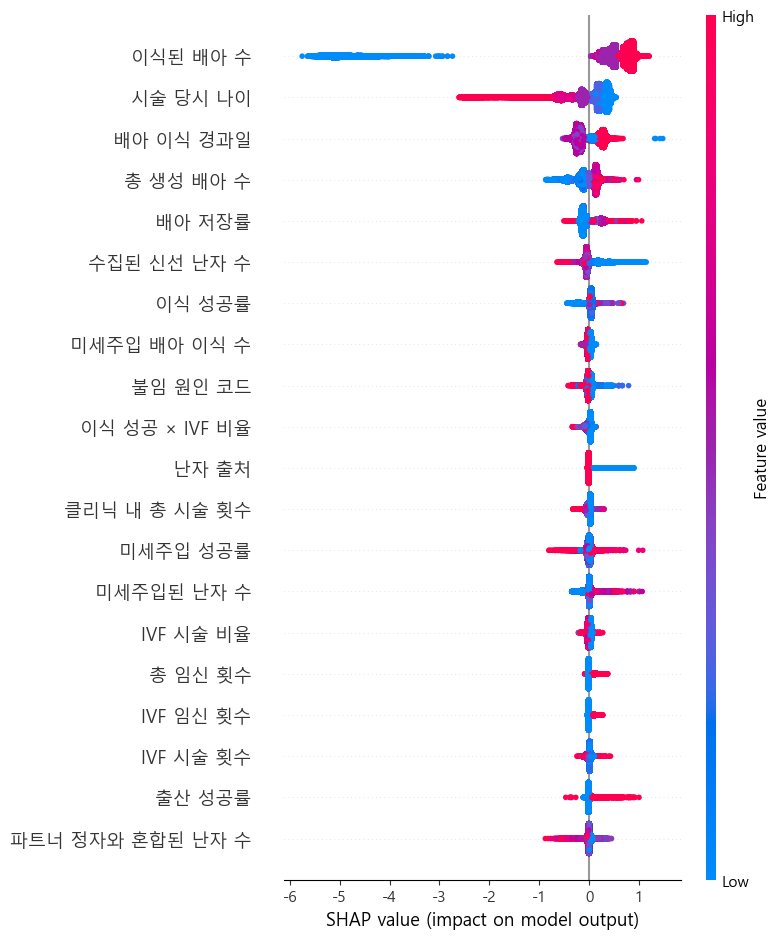


📊 Feature SHAP Values (Mean Absolute Impact)

             Feature  SHAP Value
25          이식된 배아 수    1.189200
1           시술 당시 나이    0.349461
43         배아 이식 경과일    0.211765
22         총 생성 배아 수    0.147914
49            배아 저장률    0.145648
31       수집된 신선 난자 수    0.111288
48            이식 성공률    0.062026
26      미세주입 배아 이식 수    0.035270
54          불임 원인 코드    0.035032
52    이식 성공 × IVF 비율    0.033318
36             난자 출처    0.032438
14     클리닉 내 총 시술 횟수    0.031565
47          미세주입 성공률    0.031485
23        미세주입된 난자 수    0.031474
44         IVF 시술 비율    0.030191
17           총 임신 횟수    0.029944
18         IVF 임신 횟수    0.029333
15         IVF 시술 횟수    0.029106
46            출산 성공률    0.023197
34  파트너 정자와 혼합된 난자 수    0.022203
0           시술 시기 코드    0.020375
27          저장된 배아 수    0.017145
33          혼합된 난자 수    0.016451
24   미세주입에서 생성된 배아 수    0.016433
4        단일 배아 이식 여부    0.016205
50       배아 이식 성공 예측    0.014057
13           총 시술 횟수    0.012731
3           배란 자극 여부    0.012

In [ ]:
# ✅ SHAP 분석 추가
import shap

# SHAP 값 계산을 위한 모델 선택
explainer = shap.Explainer(models["LightGBM"], X_resampled)
shap_values = explainer(X_resampled)

# SHAP 요약 플롯 생성
shap.summary_plot(shap_values, X_resampled)

# SHAP 값을 데이터프레임으로 변환
shap_df = pd.DataFrame(shap_values.values, columns=X_resampled.columns)

# 각 Feature별 평균 SHAP 값 계산 (절대값 기준 중요도)
shap_importance = shap_df.abs().mean().reset_index()  # DataFrame으로 변환
shap_importance.columns = ["Feature", "SHAP Value"]  # 컬럼명 지정
shap_importance = shap_importance.sort_values(by="SHAP Value", ascending=False)

# SHAP 값 출력
print("\n📊 Feature SHAP Values (Mean Absolute Impact)\n")
print(shap_importance)

In [ ]:
X_resampled.shape

(245661, 55)

In [ ]:
# SHAP 값이 낮은 Feature 선택 (Threshold: 0.01)
low_shap_features = shap_importance[shap_importance["SHAP Value"] < 0.002]["Feature"].tolist()

# Feature 제거 (Test 데이터에도 동일하게 적용)
X_resampled = X_resampled.drop(columns=low_shap_features, errors='ignore')
X_test = X_test.drop(columns=low_shap_features, errors='ignore')
test = test.drop(columns=low_shap_features, errors='ignore')  # test.csv에도 적용

print(f"\n🚀 {len(low_shap_features)}개의 Feature 제거 완료: {low_shap_features}")



🚀 13개의 Feature 제거 완료: ['여성 주 불임 원인', '남성 주 불임 원인', '시술 유형', 'IVF 출산 횟수', '난자 혼합 경과일', '동결 배아 사용 여부', 'DI 시술 횟수', 'DI 시술 비율', '여성 부 불임 원인', '대리모 여부', '기증 배아 사용 여부', 'DI 임신 횟수', '불임 원인 - 여성 요인']


In [ ]:
X_resampled["배아 수 × 성공률"] = X_resampled["이식된 배아 수"] * X_resampled["이식 성공률"]
X_test["배아 수 × 성공률"] = X_test["이식된 배아 수"] * X_test["이식 성공률"]
test["배아 수 × 성공률"] = test["이식된 배아 수"] * test["이식 성공률"]

X_resampled["배아 이식 경과일 / 시술 나이"] = X_resampled["배아 이식 경과일"] / (X_resampled["시술 당시 나이"] + 1)
X_test["배아 이식 경과일 / 시술 나이"] = X_test["배아 이식 경과일"] / (X_test["시술 당시 나이"] + 1)
test["배아 이식 경과일 / 시술 나이"] = test["배아 이식 경과일"] / (test["시술 당시 나이"] + 1)

X_resampled["총 생성 배아 수 × 배아 저장률"] = X_resampled["총 생성 배아 수"] * X_resampled["배아 저장률"]
X_test["총 생성 배아 수 × 배아 저장률"] = X_test["총 생성 배아 수"] * X_test["배아 저장률"]
test["총 생성 배아 수 × 배아 저장률"] = test["총 생성 배아 수"] * test["배아 저장률"]

X_resampled["총 시술 횟수 × 배아 이식 성공 예측"] = X_resampled["총 시술 횟수"] * X_resampled["배아 이식 성공 예측"]
X_test["총 시술 횟수 × 배아 이식 성공 예측"] = X_test["총 시술 횟수"] * X_test["배아 이식 성공 예측"]
test["총 시술 횟수 × 배아 이식 성공 예측"] = test["총 시술 횟수"] * test["배아 이식 성공 예측"]


In [ ]:
X_resampled["이식된 배아 수 비율"] = X_resampled["이식된 배아 수"] / (X_resampled["총 생성 배아 수"] + 1)
X_test["이식된 배아 수 비율"] = X_test["이식된 배아 수"] / (X_test["총 생성 배아 수"] + 1)
test["이식된 배아 수 비율"] = test["이식된 배아 수"] / (test["총 생성 배아 수"] + 1)

X_resampled["미세주입 배아 이식 수 비율"] = X_resampled["미세주입 배아 이식 수"] / (X_resampled["총 생성 배아 수"] + 1)
X_test["미세주입 배아 이식 수 비율"] = X_test["미세주입 배아 이식 수"] / (X_test["총 생성 배아 수"] + 1)
test["미세주입 배아 이식 수 비율"] = test["미세주입 배아 이식 수"] / (test["총 생성 배아 수"] + 1)


In [ ]:
X_resampled.shape

(245661, 48)

In [ ]:
corr_matrix = X_resampled.corr().abs()
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# 상관계수 0.95 이상인 Feature 찾기
high_corr_features = [column for column in upper.columns if any(upper[column] > 0.9)]

# Feature 제거
X_resampled.drop(columns=high_corr_features, inplace=True)
X_test.drop(columns=high_corr_features, inplace=True)
test.drop(columns=high_corr_features, inplace=True)

print(f"\n🛠 상관계수 0.9 이상인 Feature 제거 완료: {high_corr_features}")



🛠 상관계수 0.9 이상인 Feature 제거 완료: ['IVF 시술 횟수', 'IVF 임신 횟수', '미세주입에서 생성된 배아 수', '파트너 정자와 혼합된 난자 수', '출산 성공률', '이식 성공 × IVF 비율', '배아 수 × 성공률', '총 생성 배아 수 × 배아 저장률', '이식된 배아 수 비율']


In [ ]:
X_resampled.shape

(245661, 39)

In [ ]:
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

# LightGBM 재학습
best_params = {
    'max_depth': 14,
    'learning_rate': 0.016357818633025264,
    'n_estimators': 585,
    'num_leaves': 20,
    'min_child_samples': 84,
    'subsample': 0.8377057633830924,
    'colsample_bytree': 0.8279634127604395,
    'reg_alpha': 0.0034912130089010365,
    'reg_lambda': 7.401445140941314,
    'random_state': 42
}

model = LGBMClassifier(**best_params)
score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc').mean()

print(f"\n📈 Feature Selection 후 LightGBM ROC-AUC Score: {score:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50727, number of negative: 145801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007037 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 986
[LightGBM] [Info] Number of data points in the train set: 196528, number of used features: 39
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258116 -> initscore=-1.055784
[LightGBM] [Info] Start training from score -1.055784
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50728, number of negative: 145801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006692 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

In [ ]:
d

NameError: name 'd' is not defined

: 

: 

: 

In [ ]:
import optuna
from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

def objective(trial):
    param = {
        'max_depth': trial.suggest_int('max_depth', 3, 15),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
        'n_estimators': trial.suggest_int('n_estimators', 100, 1000),
        'num_leaves': trial.suggest_int('num_leaves', 20, 200),
        'min_child_samples': trial.suggest_int('min_child_samples', 5, 100),
        'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
        'colsample_bytree': trial.suggest_uniform('colsample_bytree', 0.5, 1.0),
        'reg_alpha': trial.suggest_loguniform('reg_alpha', 1e-5, 10),
        'reg_lambda': trial.suggest_loguniform('reg_lambda', 1e-5, 10),
        'random_state': 42,
    }
    
    model = LGBMClassifier(**param)
    score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc').mean()
    return score

study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

print(f"\n🔎 Best Parameters: {study.best_params}")


[I 2025-02-10 14:13:38,586] A new study created in memory with name: no-name-d9c63e94-5237-496b-9b13-51c765d17468
C:\Users\okpl8\AppData\Local\Temp\ipykernel_27512\1944130897.py:8: FutureWarning: suggest_loguniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float(..., log=True) instead.
  'learning_rate': trial.suggest_loguniform('learning_rate', 0.005, 0.2),
C:\Users\okpl8\AppData\Local\Temp\ipykernel_27512\1944130897.py:12: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0.0. Use suggest_float instead.
  'subsample': trial.suggest_uniform('subsample', 0.5, 1.0),
C:\Users\okpl8\AppData\Local\Temp\ipykernel_27512\1944130897.py:13: FutureWarning: suggest_uniform has been deprecated in v3.0.0. This feature will be removed in v6.0.0. See https://github.com/optuna/optuna/releases/tag/v3.0

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50727, number of negative: 145801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006019 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 196528, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258116 -> initscore=-1.055784
[LightGBM] [Info] Start training from score -1.055784
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, be

[W 2025-02-10 14:13:41,509] Trial 0 failed with parameters: {'max_depth': 11, 'learning_rate': 0.05038122304931528, 'n_estimators': 398, 'num_leaves': 73, 'min_child_samples': 96, 'subsample': 0.9432262510495006, 'colsample_bytree': 0.6989615405414031, 'reg_alpha': 4.254833650329066e-05, 'reg_lambda': 0.6566387563233765} because of the following error: KeyboardInterrupt().
Traceback (most recent call last):
  File "c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\optuna\study\_optimize.py", line 197, in _run_trial
    value_or_values = func(trial)
  File "C:\Users\okpl8\AppData\Local\Temp\ipykernel_27512\1944130897.py", line 20, in objective
    score = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc').mean()
  File "c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\sklearn\utils\_param_validation.py", line 216, in wrapper
    return func(*args, **kwargs)
  File "c:\Users\okpl8\anaconda3\envs\LG\lib\site-packages\sklearn\model_selection\_validation.py", line 

[LightGBM] [Warning] No further splits with positive gain, best gain: -inf


KeyboardInterrupt: 

: 

: 

: 

In [ ]:
X_resampled.shape

(245661, 31)

: 

: 

: 

In [ ]:
optimized_params = {
    'max_depth': 14,  
    'learning_rate': 0.025,  # 🚀 조금 증가 (0.016 → 0.025)
    'n_estimators': 600,  # 🚀 약간 증가 (585 → 600)
    'num_leaves': 50,  # 🚀 증가 (20 → 50)
    'min_child_samples': 40,  # 🚀 감소 (84 → 40)
    'subsample': 0.85,  # 🚀 약간 증가 (0.8377 → 0.85)
    'colsample_bytree': 0.85,  # 🚀 약간 증가 (0.8279 → 0.85)
    'reg_alpha': 0.01,  # 🚀 규제 증가 (0.003 → 0.01)
    'reg_lambda': 3.0,  # 🚀 감소 (7.4 → 3.0)
    'random_state': 42
}

from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

model = LGBMClassifier(**optimized_params)
roc_auc = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc').mean()

print(f"\n📈 개선된 LightGBM ROC-AUC Score: {roc_auc:.4f}")

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50727, number of negative: 145801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.007840 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1248
[LightGBM] [Info] Number of data points in the train set: 196528, number of used features: 43
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258116 -> initscore=-1.055784
[LightGBM] [Info] Start training from score -1.055784
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50728, number of negative: 145801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.008346 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `forc

: 

: 

: 

In [ ]:
optimized_params_v2 = {
    'max_depth': 14,  
    'learning_rate': 0.03,  # 🚀 소폭 증가
    'n_estimators': 600,  
    'num_leaves': 60,  # 🚀 증가
    'min_child_samples': 25,  # 🚀 감소
    'subsample': 0.85,  
    'colsample_bytree': 0.85,  
    'reg_alpha': 0.01,  
    'reg_lambda': 1.5,  # 🚀 추가 감소
    'random_state': 42
}

from lightgbm import LGBMClassifier
from sklearn.model_selection import cross_val_score

model = LGBMClassifier(**optimized_params_v2)
roc_auc = cross_val_score(model, X_resampled, y_resampled, cv=5, scoring='roc_auc').mean()

print(f"\n📈 개선된 LightGBM ROC-AUC Score: {roc_auc:.4f}")


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50727, number of negative: 145801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.005682 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 966
[LightGBM] [Info] Number of data points in the train set: 196528, number of used features: 31
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.258116 -> initscore=-1.055784
[LightGBM] [Info] Start training from score -1.055784
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Number of positive: 50728, number of negative: 145801
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.006269 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force

: 

: 

: 

In [ ]:
d

NameError: name 'd' is not defined

: 

: 

: 